Olá, estudante!

Meu nome é Ramon. Fico feliz em revisar seu projeto. Ao ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser consertado, caso contrário seu projeto **não** será aceito.
</div>

Você pode me responder usando isso:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import levene




# Analise dos dados

## Para o dataset `project_sql_result_01`

In [2]:
cabs =pd.read_csv('/datasets/project_sql_result_01.csv')
neiborhood = pd.read_csv('/datasets/project_sql_result_04.csv')

### Análise Qualitativa

In [3]:
print(cabs.head())

                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299


In [4]:
print(cabs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None


In [5]:
print(cabs.describe())

       trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000
max    19558.000000


In [6]:
print(cabs.duplicated().sum())

0


### Análise Estatística

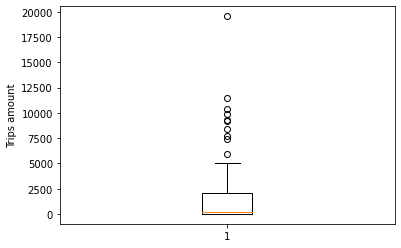

In [7]:
plt.boxplot(cabs['trips_amount'])
plt.ylabel('Trips amount')
plt.show()


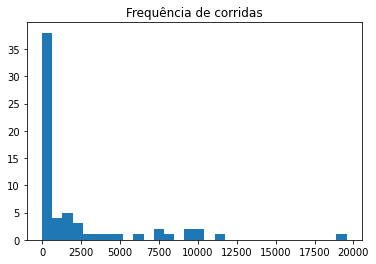

In [8]:
plt.hist(cabs['trips_amount'], bins=30)
plt.title('Frequência de corridas')
plt.show()

- Avaliando os dados deste primeiro dataset podemos ver que não temos valores nulos
- Também vemos que os tipos de dados de cada coluna está correto
- O nome dos cabeçalhos segue o padrão snake_case, não será preciso renomear
- Avaliando os dados estatístico da coluna trips_amount temos que a média de corridas por empresa de táxi é de 2145, mas a mediana é de 178. Isto se deve ao outliers observados no boxplot
- Pelo histograma é possível ver que não temos uma curva de distribuição normal e uma frequência muito alta até 2100 corridas (75% de acordo com o describe)

### Análise Quantitativa

In [9]:
#Avaliar as 10 empresas de táxi com a maior quantidade de corridas
cabs = cabs.sort_values(by='trips_amount', ascending=False)
print(cabs.head(10))

                        company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                  Medallion Leasing         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953


In [10]:
ten_cabs = cabs.loc[:9, ::]. sort_values(by='trips_amount')

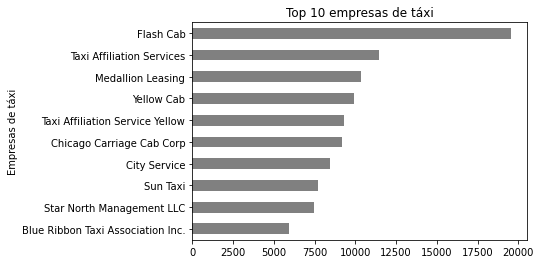

In [11]:
ten_cabs.plot(x='company_name', y='trips_amount', xlabel='Empresas de táxi'
              , ylabel='Quantidade de corridas', title='Top 10 empresas de táxi'
              , kind='barh', color='gray', legend=False)
plt.show()

## Para o dataset `project_sql_result_04`

### Análise qualitativa

In [12]:
print(neiborhood.head())

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000


In [13]:
print(neiborhood.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None


In [14]:
print(neiborhood.duplicated().sum())

0


### Análise Estatística

In [15]:
print(neiborhood.describe())

       average_trips
count      94.000000
mean      599.953728
std      1714.591098
min         1.800000
25%        14.266667
50%        52.016667
75%       298.858333
max     10727.466667


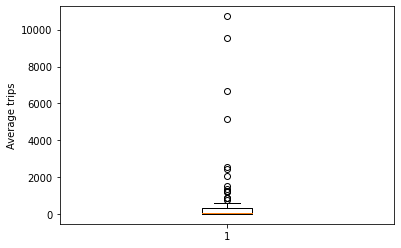

In [16]:
plt.boxplot(neiborhood['average_trips'])
plt.ylabel('Average trips')
plt.show()

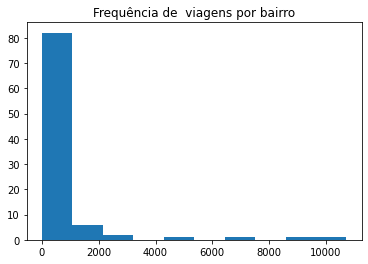

In [17]:
plt.hist(neiborhood['average_trips'])
plt.title('Frequência de  viagens por bairro')
plt.show()

- Aqui temos alguns fatores similares. A média das corridas por bairro é de 599 enquanto a mediana é de 52, ou seja, temos alguns bairros com muitas corridas.
- Não temos valores ausentes ou duplicados
- Os tipode de dados de cada coluna estão corretos, assim como seus nomes também seguem o snake_case
- A maior parte dos bairros tem até 300 corridas (75%)

### Análise quantitativa

In [18]:
#Análise dos 10 principais bairros
neiborhood = neiborhood.sort_values(by='average_trips', ascending=False)
print(neiborhood.head(10))

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


In [19]:
ten_neiborhood = neiborhood.loc[:9,::].sort_values(by='average_trips')
print(ten_neiborhood)

  dropoff_location_name  average_trips
9    Sheffield & DePaul    1259.766667
8            Gold Coast    1364.233333
7         Museum Campus    1510.000000
6            Grant Park    2068.533333
5             Lake View    2420.966667
4                O'Hare    2546.900000
3             West Loop    5163.666667
2         Streeterville    6664.666667
1           River North    9523.666667
0                  Loop   10727.466667


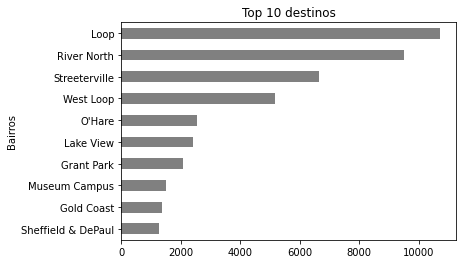

In [20]:
ten_neiborhood.plot(x='dropoff_location_name' , y='average_trips', kind='barh', title='Top 10 destinos'
                    , ylabel='Quantidade média de corridas', xlabel='Bairros', color='gray', legend=False )
plt.show()

# Teste de Hipóteses

In [21]:
loop_to_airport = pd.read_csv('/datasets/project_sql_result_07.csv')

In [22]:
print(loop_to_airport.head())

              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0


In [23]:
print(loop_to_airport.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
None


## A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare muda nos sábados chuvosos.

In [24]:
#Agrupar por tipo de condição
#Bad
loop_to_airport_rain = loop_to_airport[loop_to_airport['weather_conditions']=='Bad']\
                           
print(loop_to_airport_rain)

                 start_ts weather_conditions  duration_seconds
6     2017-11-04 16:00:00                Bad            2969.0
30    2017-11-18 12:00:00                Bad            1980.0
34    2017-11-04 17:00:00                Bad            2460.0
51    2017-11-04 16:00:00                Bad            2760.0
52    2017-11-18 12:00:00                Bad            2460.0
...                   ...                ...               ...
1031  2017-11-18 12:00:00                Bad            2560.0
1032  2017-11-18 10:00:00                Bad            1908.0
1053  2017-11-18 12:00:00                Bad            2400.0
1061  2017-11-18 16:00:00                Bad            2186.0
1067  2017-11-04 16:00:00                Bad            2834.0

[180 rows x 3 columns]


In [25]:
#Good
loop_to_airport_sunny = loop_to_airport[loop_to_airport['weather_conditions']=='Good']\
                           
print(loop_to_airport_sunny)

                 start_ts weather_conditions  duration_seconds
0     2017-11-25 16:00:00               Good            2410.0
1     2017-11-25 14:00:00               Good            1920.0
2     2017-11-25 12:00:00               Good            1543.0
3     2017-11-04 10:00:00               Good            2512.0
4     2017-11-11 07:00:00               Good            1440.0
...                   ...                ...               ...
1062  2017-11-11 06:00:00               Good            1500.0
1063  2017-11-25 11:00:00               Good               0.0
1064  2017-11-11 10:00:00               Good            1318.0
1065  2017-11-11 13:00:00               Good            2100.0
1066  2017-11-11 08:00:00               Good            1380.0

[888 rows x 3 columns]


### Definição de H0 e Ha

H0 = A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare nos sábados é igual se está chovendo ou não  
Ha = A duração média dos passeios do Loop para o Aeroporto Internacional O'Hare nos sábados é diferente quando está chovendo


### Escolha do teste e limiar de significância

alpha = 0.05  
O tipo de teste utilizado será o ttest_ind, pois as variáveis são independentes, o aumento de uma variável não está ligado diretamente ao aumento ou diminuição da outra variável
Para avaliar se podemos considerar as duas variâncias iguais farei o teste de Levene.  
Para isso temos as hipóteses H0L e HaL do teste Levene:  
- H0L: Hipótese nula do Teste de Levene (as variâncias são iguais)
- HaL: Hipótese alternativa do Teste de Levene (as variâncias são diferentes)  

Se o valor-p (l_value) do teste de levene for menor que alpha a H0L é rejeitada, se for maior não podemos rejeitar H0L


In [26]:
#Criar as variáveis que serão usadas para calcular o teste de levene
var_x = loop_to_airport_rain['duration_seconds']
var_y = loop_to_airport_sunny['duration_seconds']

In [27]:
#Função para verificar as hipóteses H0L e HaL realizar o teste
def levene_test_rel(sample1, sample2, nan_pol='omit', alpha=0.05):
    statistics, l_value = levene(sample1, sample2)
    print('l_value:', l_value)
    if l_value > alpha: #considerando H0L, variâncias iguais
        print('Considerando H0L, variâncias iguais')
        result1 = st.ttest_ind(sample1, sample2, nan_policy = nan_pol) 
        print('O p-valor é:', result1.pvalue)
        if result1.pvalue < alpha:
            print('A hipótese nula deve ser rejeitada')
        else:
            print('A hipótese nula não deve ser rejeitada')
    else: #considerando HaL, variâncias diferentes
        print('considerando HaL, variâncias diferentes')
        result1 = st.ttest_ind(sample1, sample2, equal_var=False, nan_policy= nan_pol) 
        print('O p-valor é:', result1.pvalue)
        if result1.pvalue < alpha:
            print('A hipótese nula deve ser rejeitada')
        else:
            print('A hipótese nula não deve ser rejeitada')
    
    

In [28]:
levene_test_rel(var_x, var_y)

l_value: 0.5332038671974493
Considerando H0L, variâncias iguais
O p-valor é: 6.517970327099473e-12
A hipótese nula deve ser rejeitada


## Conclusões

- De acordo com as hipóteses testadas podemos inferir o tempo médio da duração das corridas em sábados chuvosos é diferente dos outros sábados
- A distribuição das quantidades de corridas e o tempo médio de duração das mesmas não segue uma curva normal, estão deslocados para a direita
- Estes outliers distorcem bastante as médias, elevando-as frente a mediana.
- o bairro com o maior destino de corridas é o `Loop` e a empresa com a maior quantidade de corridas é a `Flash Cab`


<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>

Obrigado por enviar seu projeto. 
    
Parabéns, você fez um bom trabalho. No geral, você respondeu corretamente as questões.

Como pontos fortes do projeto, destaco:
- Código simples e eficiente
- Utilizou teste Levene para avaliar hipótese de igualdade de variâncias

Único ponto que me chama atenção é o não tratamento de outliers, pois o test T é sensível. O ideal é remover ouliers ou então substituir seu valor por um limite máximo ou mínimo.    
Bom trabalho.
</div>